# protostars
## 09- Make an Adrian Price-Whelan figure
### I. $\log{g}$

This will show us the dependence

In [1]:
import pandas as pd

In [2]:
ws = np.load("../sf/exp3/output/bb_absolute/run01/emcee_chain.npy")

In [3]:
burned = ws[:, -1000:,:]
xs, ys, zs = burned.shape
fc = burned.reshape(xs*ys, zs)
nx, ny = fc.shape

In [4]:
label = [r"$T_{\mathrm{eff}}$", r"$\log{g}$", r"$[\mathrm{Fe}/\mathrm{H}]$",r"$v_z$", r"$v\sin{i}$", r"$\log{\Omega}$", 
         r"$T_{\mathrm{BB}}$", r"$\log{\Omega_2}$", r"$c^1$", r"$c^2$", r"$c^3$", r"sigAmp", r"logAmp", r"$l$"] 

In [5]:
ws.shape

(40, 5000, 14)

Spectra

In [6]:
draws = pd.read_csv('../sf/exp1/output/veil1/run01/models_ff-05_50_95.csv')

In [7]:
sns.set_context('notebook')

In [8]:
raw_mods = np.load('../sf/exp3/output/bb_absolute/run01/raw_models.npy', mmap_mode='r')

In [9]:
raw_mods.shape

(5000, 40, 4, 936)

Subtle point here--  we save *every* spectrum, even if the sample is rejected.  So randomly sampling from the raw models is misleading, they are not draws from the posterior.  
To fix this error we need to cultivate the list of indices somehow.  
**TODO** select only samples in the posterior

In [10]:
n_samples = 2048
n_s = 0
i_s = np.random.randint(4000,5000, size=n_samples)
j_s = np.random.randint(0,40, size=n_samples)
stars, disks = raw_mods[i_s,0,0,:], raw_mods[j_s,0,1,:]

In [11]:
ws.shape

(40, 5000, 14)

In [12]:
loggs = ws[j_s, i_s,1]
teffs = ws[j_s, i_s,0]

In [13]:
sort_inds = np.argsort(loggs)
sort_inds0 = np.argsort(teffs)

In [14]:
img = stars[sort_inds,:] #+ disks[sort_inds0,:]

In [15]:
sns.set_style('ticks')
sns.set_context('poster')

In [16]:
#sns.distplot(loggs)

In [17]:
img.shape

(2048, 936)

In [18]:
avgs = np.mean(img[:, 500:], axis=1)[:,np.newaxis]
avgs.shape

(2048, 1)

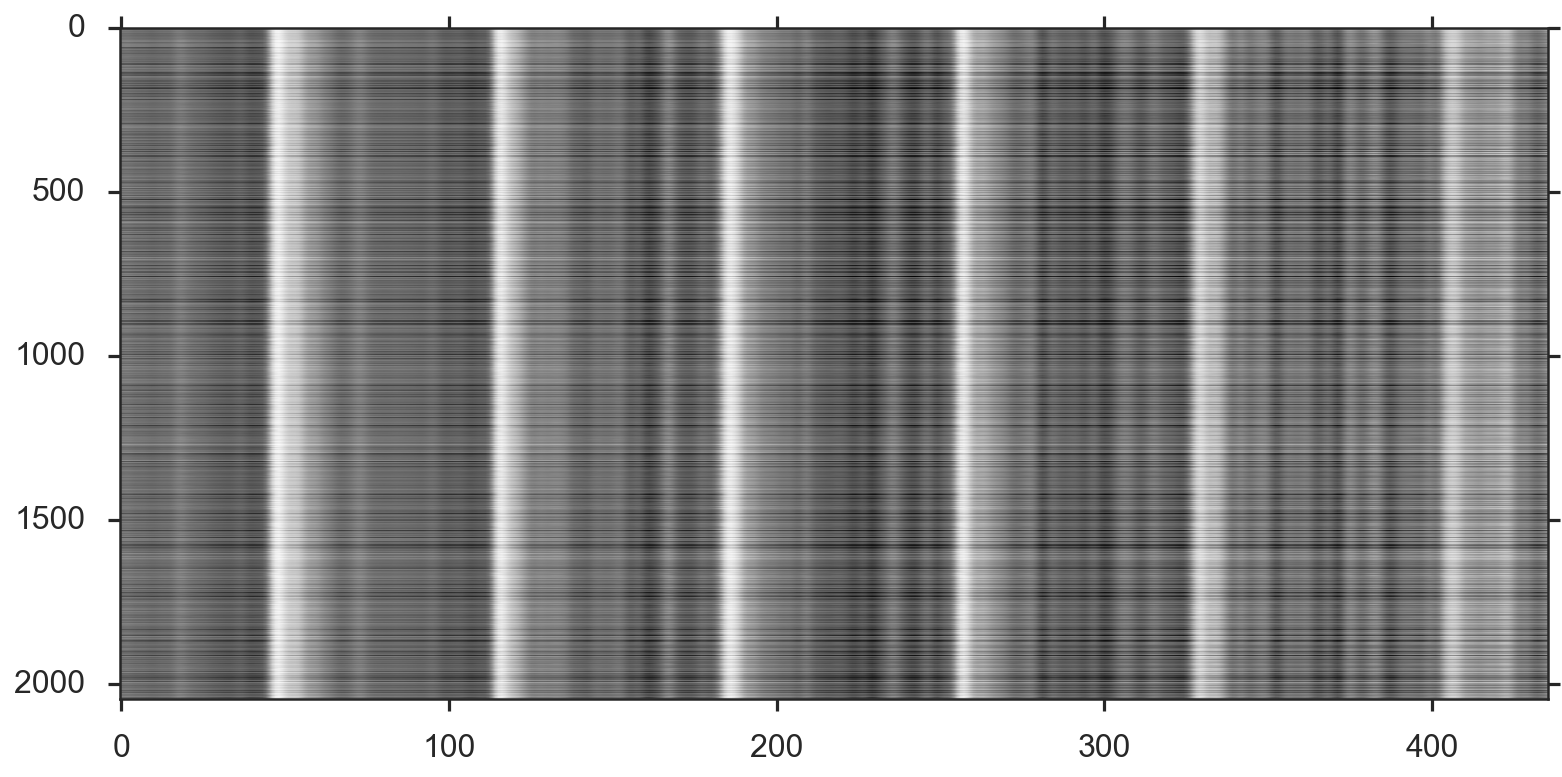

In [19]:
plt.imshow(img[:, 500:], aspect=0.1)

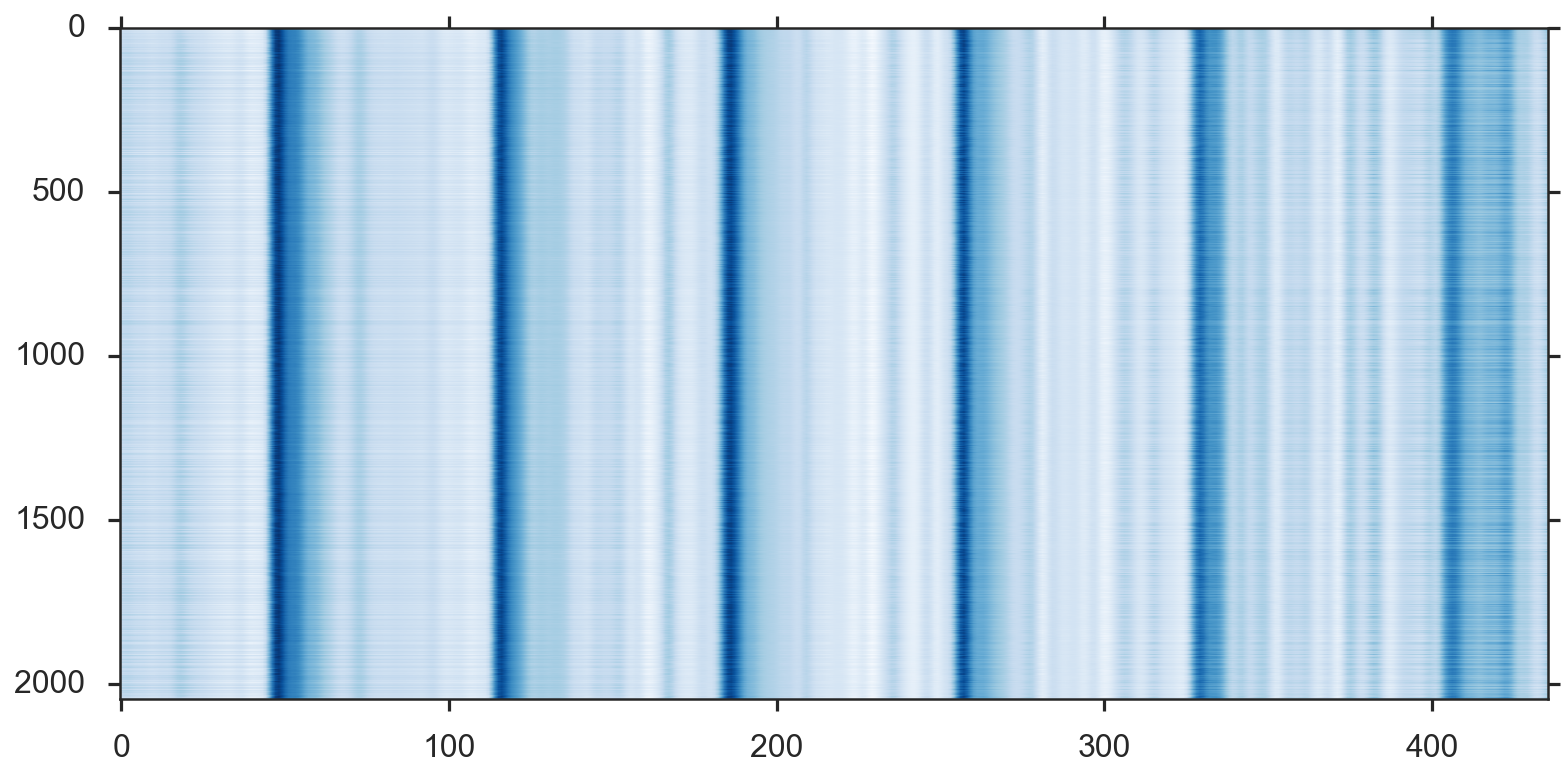

In [20]:
plt.imshow(img[:, 500:]/avgs, aspect=0.1, cmap='Blues_r')

Meh, not terribly interesting.  Not enough variance.